#DES431 Project Information

In [ ]:
# Group Member:

# Nuntapong Jedsdariyajit   6322773100
# Theerachote Tanprawat     6322772094
# Peeranut Aimcharoen       6322772086
# Ayush Kwatra              6322774645

# 0 - 2: DATA CLEANSING AND SURFACE FILTRATION




In [ ]:
# 0. Import session

!pip install umap-learn

# Normal imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from umap import UMAP

# Download data
!curl -o /content/pisa2018_math_items.csv https://raw.githubusercontent.com/cholwich/des431project1/main/pisa2018_math_items.csv
!curl -o /content/pisa2018_math_bel.csv https://raw.githubusercontent.com/cholwich/des431project1/main/pisa2018_math_bel.csv

# Information related to math items
items = pd.read_csv('/content/pisa2018_math_items.csv')
# items

# Students' score and time
df = pd.read_csv('/content/pisa2018_math_bel.csv')
# df

In [ ]:
items

,Score Column,Time Column,Unit Name,Cluster,Sequence in Cluster,Sequence in Unit,Item Format,Content,Situation/Context,Process
0,CM033Q01S,CM033Q01T,A View Room,M01,1,1/1,Simple Multiple Choice - Computer Scored,Space and Shape,Personal,"Interpreting, Applying and Evaluating Mathemat..."
1,CM474Q01S,CM474Q01T,Running Time,M01,2,1/1,Simple Multiple Choice - Computer Scored,Quantity,Personal,"Employing Mathematical Concepts, Facts and Pro..."
2,DM155Q02C,CM155Q02T,Population Pyramids,M01,3,1/4,Open Response - Human Coded,Change and Relationships,Scientific,"Interpreting, Applying and Evaluating Mathemat..."
3,CM155Q01S,CM155Q01T,Population Pyramids,M01,4,2/4,Complex Multiple Choice - Computer Scored,Change and Relationships,Scientific,"Employing Mathematical Concepts, Facts and Pro..."
4,DM155Q03C,CM155Q03T,Population Pyramids,M01,5,3/4,Open Response - Human Coded,Change and Relationships,Scientific,"Employing Mathematical Concepts, Facts and Pro..."
...,...,...,...,...,...,...,...,...,...,...
77,DM961Q05C,CM961Q05T,Chocolate,M6B,8,3/3,Open Response - Human Coded,Uncertainty and Data,Occupational,"Interpreting, Applying and Evaluating Mathemat..."
78,CM939Q01S,CM939Q01T,Racing,M6B,9,1/2,Simple Multiple Choice - Computer Scored,Uncertainty and Data,Societal,"Interpreting, Applying and Evaluating Mathemat..."
79,CM939Q02S,CM939Q02T,Racing,M6B,10,2/2,Simple Multiple Choice - Computer Scored,Uncertainty and Data,Societal,"Interpreting, Applying and Evaluating Mathemat..."
80,CM967Q01S,CM967Q01T,Wooden Train Set,M6B,11,1/2,Open Response - Computer Scored,Space and Shape,Personal,"Employing Mathematical Concepts, Facts and Pro..."


In [ ]:
df

,CNT,CNTSCHID,CNTSTUID,CM033Q01T,CM474Q01T,CM155Q02T,CM155Q01T,CM155Q03T,CM155Q04T,CM411Q01T,...,CM967Q01S,CM967Q03S,M01,M02,M03,M04,M05,M6A,M6B,sum
0,BEL,5600011,5600001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
1,BEL,5600179,5600002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,12,0,12,0,24
2,BEL,5600092,5600003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,12,0,12,0,24
3,BEL,5600296,5600004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
4,BEL,5600273,5600005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,BEL,5600270,5609815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,11,0,0,0,0,11
8471,BEL,5600287,5609817,42973.0,40612.0,114773.0,64336.0,37227.0,85278.0,300084.0,...,NaN,NaN,12,11,0,0,0,0,0,23
8472,BEL,5600006,5609818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,11,0,0,0,12,0,23
8473,BEL,5600243,5609819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,11,0,12,0,0,23


In [ ]:
# 1. Remove student with no value on all clusters

clusters = items['Cluster'].drop_duplicates().tolist()
for c in clusters:
    time_columns = items[items['Cluster'] == c]['Time Column']
    df[c] = df.loc[:, time_columns].count(axis=1)
df["sum"]=df.loc[:, clusters].sum(axis=1)

In [ ]:
# 2. Cluter assign and data filtration

# Get list of score_column & time_column in each cluster
link = items['Cluster'].drop_duplicates().tolist()
for c in link:
    Score_Column = items['Score Column']
    time_column = items['Time Column']
    Score_Column_M01 = items[items['Cluster'] == "M01"]['Score Column']
    time_column_M01 = items[items['Cluster'] == "M01"]['Time Column']
    Score_Column_M02 = items[items['Cluster'] == "M02"]['Score Column']
    time_column_M02 = items[items['Cluster'] == "M02"]['Time Column']
    Score_Column_M03 = items[items['Cluster'] == "M03"]['Score Column']
    time_column_M03 = items[items['Cluster'] == "M03"]['Time Column']
    Score_Column_M04 = items[items['Cluster'] == "M04"]['Score Column']
    time_column_M04 = items[items['Cluster'] == "M04"]['Time Column']
    Score_Column_M05 = items[items['Cluster'] == "M05"]['Score Column']
    time_column_M05 = items[items['Cluster'] == "M05"]['Time Column']
    Score_Column_M6A = items[items['Cluster'] == "M6A"]['Score Column']
    time_column_M6A = items[items['Cluster'] == "M6A"]['Time Column']
    Score_Column_M6B = items[items['Cluster'] == "M6B"]['Score Column']
    time_column_M6B = items[items['Cluster'] == "M6B"]['Time Column']

Score_column_All_removeM6B = Score_Column[0:len(Score_Column) - 12]

# Filter data to only if student did have data in that cluster (e.g., If record has empty in that column, student will not be included in that session)
df_filteredM01 = df[df["M01"] !=0]
df_filteredM02 = df[df["M02"] !=0]
df_filteredM03 = df[df["M03"] !=0]
df_filteredM04 = df[df["M04"] !=0]
df_filteredM05 = df[df["M05"] !=0]
df_filteredM6A = df[df["M6A"] !=0]
df_filteredM6B = df[df["M6B"] !=0]
dfAll_filtered = df[df["sum"] !=0]

# Replace "NaN" with NaN value
dfAll = dfAll_filtered.replace("NaN", np.nan)
dfM01 = df_filteredM01.replace("NaN", np.nan)
dfM02 = df_filteredM02.replace("NaN", np.nan)
dfM03 = df_filteredM03.replace("NaN", np.nan)
dfM04 = df_filteredM04.replace("NaN", np.nan)
dfM05 = df_filteredM05.replace("NaN", np.nan)
dfM6A = df_filteredM6A.replace("NaN", np.nan)
dfM6B = df_filteredM6B.replace("NaN", np.nan)
dfAll_removeM6B = dfAll_filtered_removeM6B.replace("NaN", np.nan)

# 3. DATA CONVERTER (FOR NORMALIZATION)

In [ ]:
# 3. Define score converter function (Will be used later for normalization)

def score_converter_DM(cell): # Convert scores that are checked by hands (DM*C)
  if cell >= 20.0:
    return 1.0
  elif cell >=10.0:
    return 0.5
  else:
    return 0.0

def score_converter_CM(cell): # Convert scores that are automatically checked (CM*S)
  if cell >= 0:
    return cell
  else:
    return 0.0

In [ ]:
# 3.X OTHER FUNCTIONS

def score_converter_DM_All(cell): # Convert scores that are checked by hands (DM*C)
  if cell >= 20.0:
    return 1.0
  elif cell >=10.0:
    return 0.5
  elif cell >= 2.0:
    return 1.0
  elif cell >=1.0:
    return 0.5
  else:
    return 0.0

def score_converter_DM_M01(cell): # Convert scores that are checked by hands (DM*C)
  if cell >= 20.0:
    return 1.0
  elif cell >=10.0:
    return 0.5
  else:
    return 0.0

def score_converter_DM_M02_M03(cell): # Convert scores that are checked by hands (DM*C)
  if cell >= 0:
    return cell
  else:
    return 0.0

def score_converter_DM_M04_M05(cell): # Convert scores that are checked by hands (DM*C)
  if cell >= 2.0:
    return 1.0
  elif cell >=1.0:
    return 0.5
  else:
    return 0.0

def score_converter_DM_M6A(cell): # Convert scores that are checked by hands (DM*C)
  if cell >= 20.0:
    return 1.0
  elif cell >=10.0:
    return 0.5
  if cell >= 0:
    return cell
  else:
    return 0.0

# 4. DATA DIVISION
Divide data into two groups; First start

In [ ]:
# 4. Divide score data into two groups; Those that are DM*C and those that are CM*S

Score_DM=[]
Score_CM=[]
Score_DM_M01=[]
Score_CM_M01=[]
Score_DM_M02=[]
Score_CM_M02=[]
Score_DM_M03=[]
Score_CM_M03=[]
Score_DM_M04=[]
Score_CM_M04=[]
Score_DM_M05=[]
Score_CM_M05=[]
Score_DM_M6A=[]
Score_CM_M6A=[]
Score_DM_M6B=[]
Score_CM_M6B=[]
Score_DM_removeM6B=[]
Score_CM_removeM6B=[]

for s in Score_Column:
  if  s.startswith("DM"):
    Score_DM.append(s)
  else:
    Score_CM.append(s)

for s in Score_Column_M01:
  if  s.startswith("DM"):
    Score_DM_M01.append(s)
  else:
    Score_CM_M01.append(s)

for s in Score_Column_M02:
  if  s.startswith("DM"):
    Score_DM_M02.append(s)
  else:
    Score_CM_M02.append(s)

for s in Score_Column_M03:
  if  s.startswith("DM"):
    Score_DM_M03.append(s)
  else:
    Score_CM_M03.append(s)

for s in Score_Column_M04:
  if  s.startswith("DM"):
    Score_DM_M04.append(s)
  else:
    Score_CM_M04.append(s)

for s in Score_Column_M05:
  if  s.startswith("DM"):
    Score_DM_M05.append(s)
  else:
    Score_CM_M05.append(s)

for s in Score_Column_M6A:
  if  s.startswith("DM"):
    Score_DM_M6A.append(s)
  else:
    Score_CM_M6A.append(s)

for s in Score_Column_M6B:
  if  s.startswith("DM"):
    Score_DM_M6B.append(s)
  else:
    Score_CM_M6B.append(s)

for s in Score_column_All_removeM6B:
  if  s.startswith("DM"):
    Score_DM_removeM6B.append(s)
  else:
    Score_CM_removeM6B.append(s)

# 5.1 DATA NORMALIZATION

In [ ]:
# 5. Data normalization

for s in Score_DM:
  dfAll[s] = dfAll[s].apply(score_converter_DM_All)

for s in Score_CM:
  dfAll[s] = dfAll[s].apply(score_converter_CM)

for s in Score_DM_M01:
  dfM01[s] = dfM01[s].apply(score_converter_DM_M01)

for s in Score_CM_M01:
  dfM01[s] = dfM01[s].apply(score_converter_CM)

for s in Score_DM_M02:
  dfM02[s] = dfM02[s].apply(score_converter_DM_M02_M03)

for s in Score_CM_M02:
  dfM02[s] = dfM02[s].apply(score_converter_CM)

for s in Score_DM_M03:
  dfM03[s] = dfM03[s].apply(score_converter_DM_M02_M03)

for s in Score_CM_M03:
  dfM03[s] = dfM03[s].apply(score_converter_CM)

for s in Score_DM_M04:
  dfM04[s] = dfM04[s].apply(score_converter_DM_M04_M05)

for s in Score_CM_M04:
  dfM04[s] = dfM04[s].apply(score_converter_CM)

for s in Score_DM_M05:
  dfM05[s] = dfM05[s].apply(score_converter_DM_M04_M05)

for s in Score_CM_M05:
  dfM05[s] = dfM05[s].apply(score_converter_CM)

for s in Score_DM_M6A:
  dfM6A[s] = dfM6A[s].apply(score_converter_DM_M6A)

for s in Score_CM_M6A:
  dfM6A[s] = dfM6A[s].apply(score_converter_CM)

for s in Score_DM_M6B:
  dfM6B[s] = dfM6B[s].apply(score_converter_DM_M6A)

for s in Score_CM_M6B:
  dfM6B[s] = dfM6B[s].apply(score_converter_CM)

# 5.2 DATA STANDARDIZATION

In [ ]:
# 5.2 Data Standardization

scaler1 = StandardScaler()
scaler1.fit(dfM01[Score_Column_M01])
dfM01[Score_Column_M01] = scaler1.transform(dfM01[Score_Column_M01])

scaler2 = StandardScaler()
scaler2.fit(dfM02[Score_Column_M02])
dfM02[Score_Column_M02] = scaler2.transform(dfM02[Score_Column_M02])

scaler3 = StandardScaler()
scaler3.fit(dfM03[Score_Column_M03])
dfM03[Score_Column_M03] = scaler3.transform(dfM03[Score_Column_M03])

scaler4 = StandardScaler()
scaler4.fit(dfM04[Score_Column_M04])
dfM04[Score_Column_M04] = scaler4.transform(dfM04[Score_Column_M04])

scaler5 = StandardScaler()
scaler5.fit(dfM05[Score_Column_M05])
dfM05[Score_Column_M05] = scaler5.transform(dfM05[Score_Column_M05])

scaler6A = StandardScaler()
scaler6A.fit(dfM6A[Score_Column_M6A])
dfM6A[Score_Column_M6A] = scaler6A.transform(dfM6A[Score_Column_M6A])

scaler7 = StandardScaler()
scaler7.fit(dfAll[Score_Column])
dfAll[Score_Column] = scaler7.transform(dfAll[Score_Column])

scaler8 = StandardScaler()
scaler8.fit(dfAll_removeM6B[Score_column_All_removeM6B])
dfAll_removeM6B[Score_column_All_removeM6B] = scaler8.transform(dfAll_removeM6B[Score_column_All_removeM6B])

# 6. PCA Implementation (Column matching for T-SNE)

In [ ]:
# 6. Visualization: PCA (Dimension reduction) + Concatenation back

pca = PCA(n_components=3)
pca1 = PCA(n_components=2)
pcaA = PCA(n_components=18)
pca_data_CM = pcaA.fit_transform(dfAll[Score_CM].fillna(0))
pca_data_DM = pcaA.fit_transform(dfAll[Score_DM].fillna(0))
pca_data_CM_M01 = pca.fit_transform(dfM01[Score_CM_M01].fillna(0))
pca_data_DM_M01 = pca.fit_transform(dfM01[Score_DM_M01].fillna(0))
pca_data_CM_M02 = pca1.fit_transform(dfM02[Score_CM_M02].fillna(0))
pca_data_DM_M02 = pca1.fit_transform(dfM02[Score_DM_M02].fillna(0))
pca_data_CM_M03 = pca1.fit_transform(dfM03[Score_CM_M03].fillna(0))
pca_data_DM_M03 = pca1.fit_transform(dfM03[Score_DM_M03].fillna(0))
pca_data_CM_M04 = pca.fit_transform(dfM04[Score_CM_M04].fillna(0))
pca_data_DM_M04 = pca.fit_transform(dfM04[Score_DM_M04].fillna(0))
pca_data_CM_M05 = pca.fit_transform(dfM05[Score_CM_M05].fillna(0))
pca_data_DM_M05 = pca.fit_transform(dfM05[Score_DM_M05].fillna(0))
pca_data_CM_M6A = pca.fit_transform(dfM6A[Score_CM_M6A].fillna(0))
pca_data_DM_M6A = pca.fit_transform(dfM6A[Score_DM_M6A].fillna(0))
pca_data_CM_removeM6B = pcaA.fit_transform(dfAll_removeM6B[Score_CM_removeM6B].fillna(0))
pca_data_DM_removeM6B = pcaA.fit_transform(dfAll_removeM6B[Score_DM_removeM6B].fillna(0))

# Concatenate the two PCA data from each cluster (from CM* and DM* set) before putting into T-SNE
concatenated_tsne = pd.concat([pd.DataFrame(pca_data_CM), pd.DataFrame(pca_data_DM)], axis=0)
concatenated_tsne_M01 = pd.concat([pd.DataFrame(pca_data_CM_M01), pd.DataFrame(pca_data_DM_M01)], axis=0)
concatenated_tsne_M02 = pd.concat([pd.DataFrame(pca_data_CM_M02), pd.DataFrame(pca_data_DM_M02)], axis=0)
concatenated_tsne_M03 = pd.concat([pd.DataFrame(pca_data_CM_M03), pd.DataFrame(pca_data_DM_M03)], axis=0)
concatenated_tsne_M04 = pd.concat([pd.DataFrame(pca_data_CM_M04), pd.DataFrame(pca_data_DM_M04)], axis=0)
concatenated_tsne_M05 = pd.concat([pd.DataFrame(pca_data_CM_M05), pd.DataFrame(pca_data_DM_M05)], axis=0)
concatenated_tsne_M6A = pd.concat([pd.DataFrame(pca_data_CM_M6A), pd.DataFrame(pca_data_DM_M6A)], axis=0)
# concatenated_tsne_M6B = pd.concat([pd.DataFrame(pca_data_CM_M6B), pd.DataFrame(pca_data_DM_M6B)], axis=0)
concatenated_tsne_removeM6B = pd.concat([pd.DataFrame(pca_data_CM_removeM6B), pd.DataFrame(pca_data_DM_removeM6B)], axis=0)
# M6B data is empty = not taken into account

# 7.1 TSNE Implemetation

In [ ]:
# 7.1 Visualization: T-SNE (Actual visualization process)

tsne = TSNE(n_components=2,perplexity=30, learning_rate=200, n_iter=1500)
tsne2 = TSNE(n_components=2,perplexity=30, learning_rate=200, n_iter=2500)

# Fit transform the concatenated tsne data
final_tsne_data = tsne2.fit_transform(concatenated_tsne)
final_tsne_data_removeM6B = tsne2.fit_transform(concatenated_tsne_removeM6B)
final_tsne_data_M01 = tsne.fit_transform(concatenated_tsne_M01)
final_tsne_data_M02 = tsne.fit_transform(concatenated_tsne_M02)
final_tsne_data_M03 = tsne.fit_transform(concatenated_tsne_M03)
final_tsne_data_M04 = tsne.fit_transform(concatenated_tsne_M04)
final_tsne_data_M05 = tsne.fit_transform(concatenated_tsne_M05)
final_tsne_data_M6A = tsne.fit_transform(concatenated_tsne_M6A)
#final_tsne_data_M6B = tsne.fit_transform(concatenated_tsne_M6B)

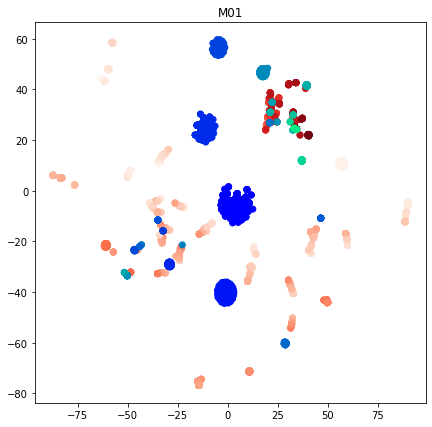

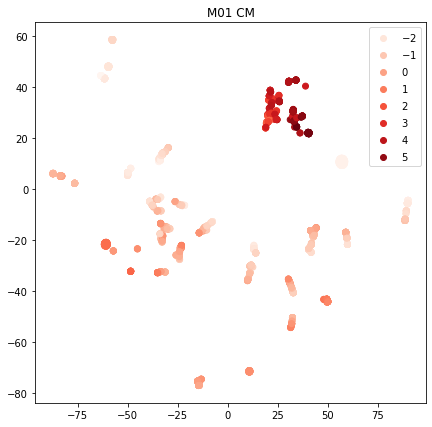

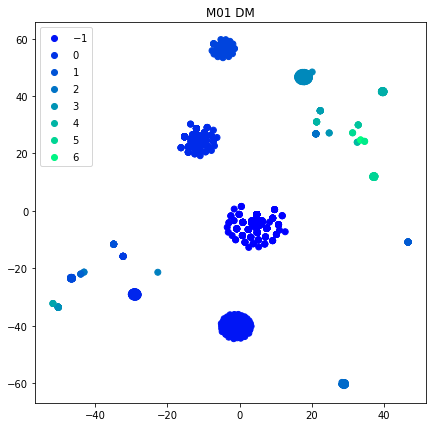

In [ ]:
#M01
#color01A = np.sum(dfAll[Score_CM], axis=1)
#kmeans = KMeans(n_clusters = 3)
#color01C = kmeans.fit_predict(pca_data_CM_M01)
#color01D = kmeans.fit_predict(pca_data_DM_M01)
color01C = np.sum(pca_data_CM_M01, axis=1)
color01D = np.sum(pca_data_DM_M01, axis=1)
#color01C = np.sum(dfM01[Score_DM_M01], axis=1)
#color01D = np.sum(dfM01[Score_CM_M01], axis=1)
# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_M01[:len(pca_data_CM_M01), 0], final_tsne_data_M01[:len(pca_data_CM_M01), 1], c=color01C, cmap="Reds")
plt.scatter(final_tsne_data_M01[len(pca_data_CM_M01):, 0], final_tsne_data_M01[len(pca_data_CM_M01):, 1], c=color01D, cmap="winter")
plt.title("M01")
plt.show()

plt.figure(figsize=(7,7))
pM01C = plt.scatter(final_tsne_data_M01[:len(pca_data_CM_M01), 0], final_tsne_data_M01[:len(pca_data_CM_M01), 1], c=color01C, cmap="Reds")
plt.title("M01 CM")
plt.legend(*pM01C.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM01D = plt.scatter(final_tsne_data_M01[len(pca_data_CM_M01):, 0], final_tsne_data_M01[len(pca_data_CM_M01):, 1], c=color01D, cmap="winter")
plt.title("M01 DM")
plt.legend(*pM01D.legend_elements())
plt.show()

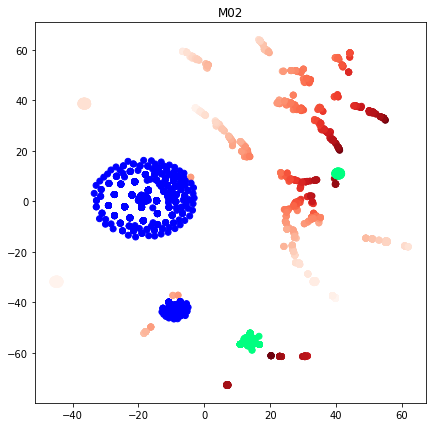

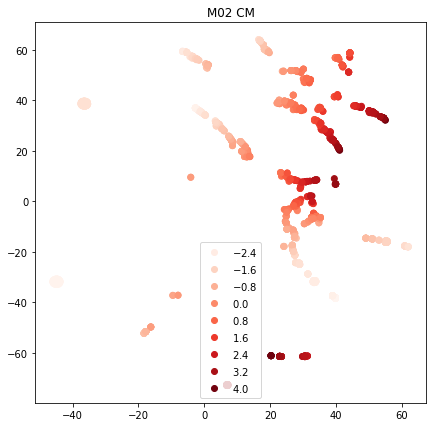

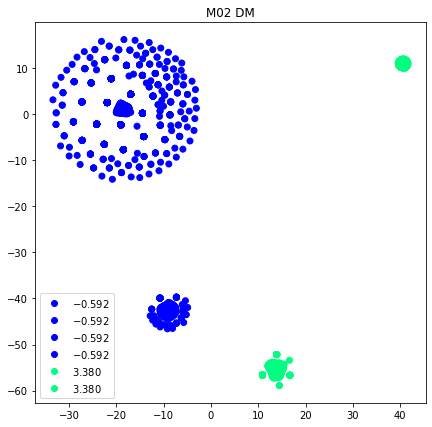

In [ ]:
#M02
#color02A = np.sum(dfAll[Score_CM], axis=1)
#kmeans = KMeans(n_clusters = 3)
#color02C = kmeans.fit_predict(pca_data_CM_M02)
#color02D = kmeans.fit_predict(pca_data_DM_M02)
color02C = np.sum(pca_data_CM_M02, axis=1)
color02D = np.sum(pca_data_DM_M02, axis=1)
#color02C = np.sum(dfM02[Score_DM_M02], axis=1)
#color02D = np.sum(dfM02[Score_CM_M02], axis=1)
# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_M02[:len(pca_data_CM_M02), 0], final_tsne_data_M02[:len(pca_data_CM_M02), 1], c=color02C, cmap="Reds")
plt.scatter(final_tsne_data_M02[len(pca_data_CM_M02):, 0], final_tsne_data_M02[len(pca_data_CM_M02):, 1], c=color02D, cmap="winter")
plt.title("M02")
plt.show()

plt.figure(figsize=(7,7))
pM02C = plt.scatter(final_tsne_data_M02[:len(pca_data_CM_M02), 0], final_tsne_data_M02[:len(pca_data_CM_M02), 1], c=color02C, cmap="Reds")
plt.title("M02 CM")
plt.legend(*pM02C.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM02D = plt.scatter(final_tsne_data_M02[len(pca_data_CM_M02):, 0], final_tsne_data_M02[len(pca_data_CM_M02):, 1], c=color02D, cmap="winter")
plt.title("M02 DM")
plt.legend(*pM02D.legend_elements())
plt.show()

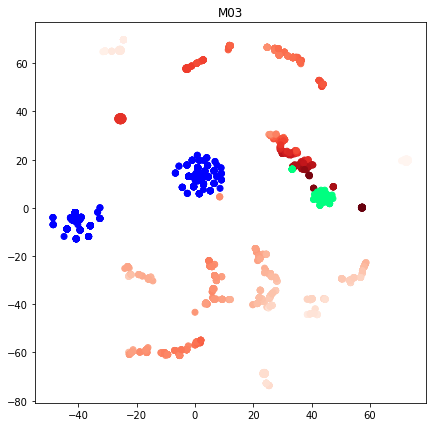

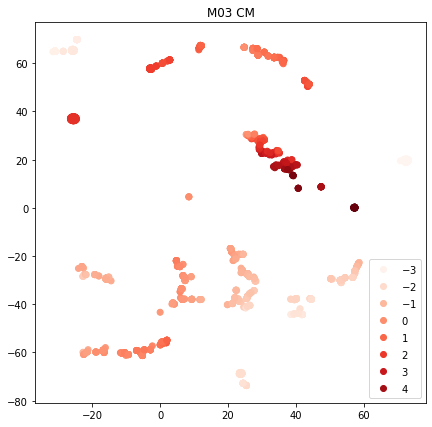

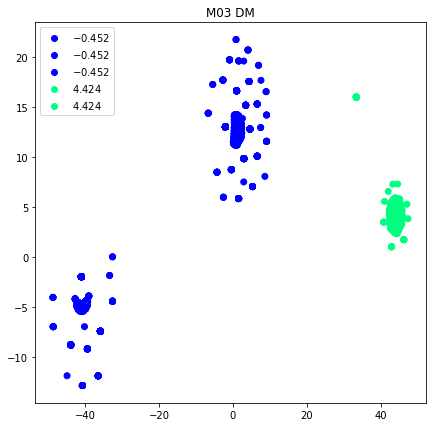

In [ ]:
#M03
#color03A = np.sum(dfAll[Score_CM], axis=1)
#kmeans = KMeans(n_clusters = 3)
#color03C = kmeans.fit_predict(pca_data_CM_M03)
#color03D = kmeans.fit_predict(pca_data_DM_M03)
color03C = np.sum(pca_data_CM_M03, axis=1)
color03D = np.sum(pca_data_DM_M03, axis=1)
#color03C = np.sum(dfM03[Score_DM_M03], axis=1)
#color03D = np.sum(dfM03[Score_CM_M03], axis=1)
# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_M03[:len(pca_data_CM_M03), 0], final_tsne_data_M03[:len(pca_data_CM_M03), 1], c=color03C, cmap="Reds")
plt.scatter(final_tsne_data_M03[len(pca_data_CM_M03):, 0], final_tsne_data_M03[len(pca_data_CM_M03):, 1], c=color03D, cmap="winter")
plt.title("M03")
plt.show()

plt.figure(figsize=(7,7))
pM03C = plt.scatter(final_tsne_data_M03[:len(pca_data_CM_M03), 0], final_tsne_data_M03[:len(pca_data_CM_M03), 1], c=color03C, cmap="Reds")
plt.title("M03 CM")
plt.legend(*pM03C.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM03D = plt.scatter(final_tsne_data_M03[len(pca_data_CM_M03):, 0], final_tsne_data_M03[len(pca_data_CM_M03):, 1], c=color03D, cmap="winter")
plt.title("M03 DM")
plt.legend(*pM03D.legend_elements())
plt.show()

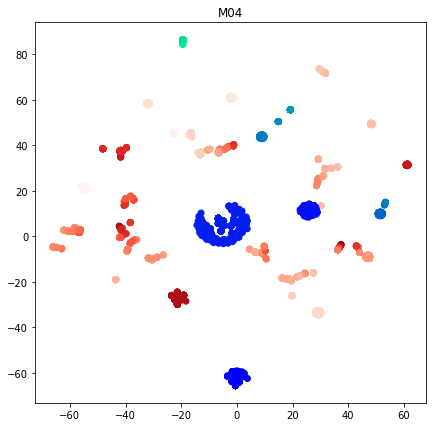

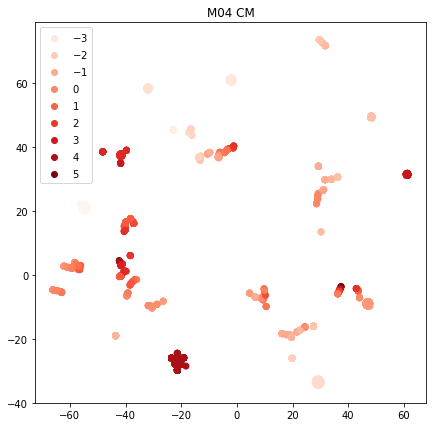

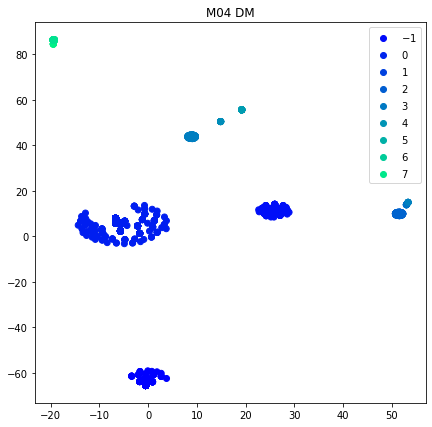

In [ ]:
#M04
#color04A = np.sum(dfAll[Score_CM], axis=1)
#kmeans = KMeans(n_clusters = 3)
#color04C = kmeans.fit_predict(pca_data_CM_M04)
#color04D = kmeans.fit_predict(pca_data_DM_M04)
color04C = np.sum(pca_data_CM_M04, axis=1)
color04D = np.sum(pca_data_DM_M04, axis=1)
#color04C = np.sum(dfM04[Score_DM_M04], axis=1)
#color04D = np.sum(dfM04[Score_CM_M04], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_M04[:len(pca_data_CM_M04), 0], final_tsne_data_M04[:len(pca_data_CM_M04), 1], c=color04C, cmap="Reds")
plt.scatter(final_tsne_data_M04[len(pca_data_CM_M04):, 0], final_tsne_data_M04[len(pca_data_CM_M04):, 1], c=color04D, cmap="winter")
plt.title("M04")
plt.show()

plt.figure(figsize=(7,7))
pM04C = plt.scatter(final_tsne_data_M04[:len(pca_data_CM_M04), 0], final_tsne_data_M04[:len(pca_data_CM_M04), 1], c=color04C, cmap="Reds")
plt.title("M04 CM")
plt.legend(*pM04C.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM04D = plt.scatter(final_tsne_data_M04[len(pca_data_CM_M04):, 0], final_tsne_data_M04[len(pca_data_CM_M04):, 1], c=color04D, cmap="winter")
plt.title("M04 DM")
plt.legend(*pM04D.legend_elements())
plt.show()

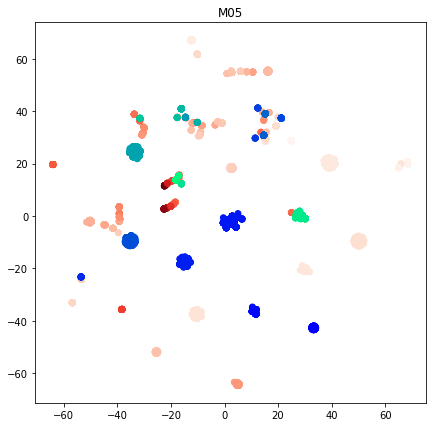

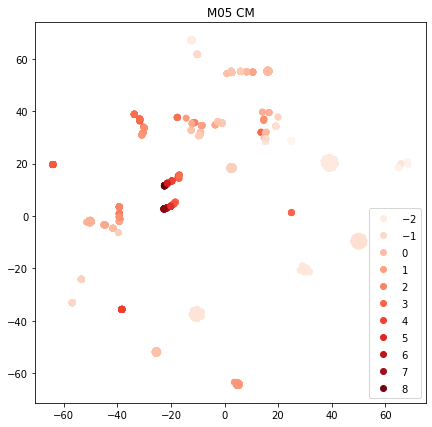

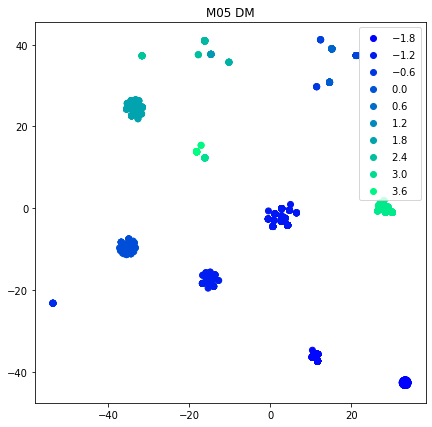

In [ ]:
#M05
#color05A = np.sum(dfAll[Score_CM], axis=1)
#kmeans = KMeans(n_clusters = 3)
#color05C = kmeans.fit_predict(pca_data_CM_M05)
#color05D = kmeans.fit_predict(pca_data_DM_M05)
color05C = np.sum(pca_data_CM_M05, axis=1)
color05D = np.sum(pca_data_DM_M05, axis=1)
#color05C = np.sum(dfM05[Score_DM_M05], axis=1)
#color05D = np.sum(dfM05[Score_CM_M05], axis=1)

#Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_M05[:len(pca_data_CM_M05), 0], final_tsne_data_M05[:len(pca_data_CM_M05), 1], c=color05C, cmap="Reds")
plt.scatter(final_tsne_data_M05[len(pca_data_CM_M05):, 0], final_tsne_data_M05[len(pca_data_CM_M05):, 1], c=color05D, cmap="winter")
plt.title("M05")
plt.show()

plt.figure(figsize=(7,7))
pM05C = plt.scatter(final_tsne_data_M05[:len(pca_data_CM_M05), 0], final_tsne_data_M05[:len(pca_data_CM_M05), 1], c=color05C, cmap="Reds")
plt.title("M05 CM")
plt.legend(*pM05C.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM05D = plt.scatter(final_tsne_data_M05[len(pca_data_CM_M05):, 0], final_tsne_data_M05[len(pca_data_CM_M05):, 1], c=color05D, cmap="winter")
plt.title("M05 DM")
plt.legend(*pM05D.legend_elements())
plt.show()

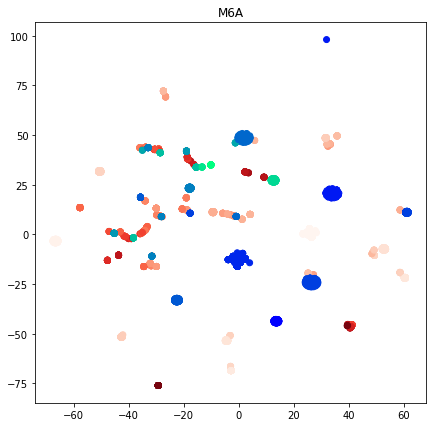

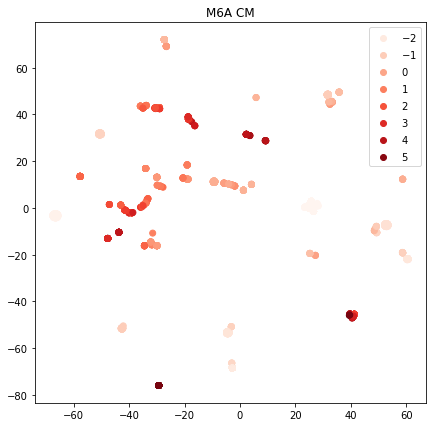

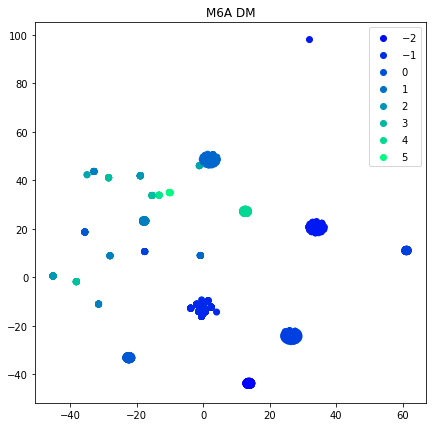

In [ ]:
#M6A
#color01A = np.sum(dfAll[Score_CM], axis=1)
#kmeans = KMeans(n_clusters = 3)
#color01C = kmeans.fit_predict(pca_data_CM_M6A)
#color01D = kmeans.fit_predict(pca_data_DM_M6A)
color6AC = np.sum(pca_data_CM_M6A, axis=1)
color6AD = np.sum(pca_data_DM_M6A, axis=1)
#color01C = np.sum(dfM6A[Score_DM_M6A], axis=1)
#color01D = np.sum(dfM6A[Score_CM_M6A], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_M6A[:len(pca_data_CM_M6A), 0], final_tsne_data_M6A[:len(pca_data_CM_M6A), 1], c=color6AC, cmap="Reds")
plt.scatter(final_tsne_data_M6A[len(pca_data_CM_M6A):, 0], final_tsne_data_M6A[len(pca_data_CM_M6A):, 1], c=color6AD, cmap="winter")
plt.title("M6A")
plt.show()

plt.figure(figsize=(7,7))
pM6AC = plt.scatter(final_tsne_data_M6A[:len(pca_data_CM_M6A), 0], final_tsne_data_M6A[:len(pca_data_CM_M6A), 1], c=color6AC, cmap="Reds")
plt.title("M6A CM")
plt.legend(*pM6AC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM6AD = plt.scatter(final_tsne_data_M6A[len(pca_data_CM_M6A):, 0], final_tsne_data_M6A[len(pca_data_CM_M6A):, 1], c=color6AD, cmap="winter")
plt.title("M6A DM")
plt.legend(*pM6AD.legend_elements())
plt.show()

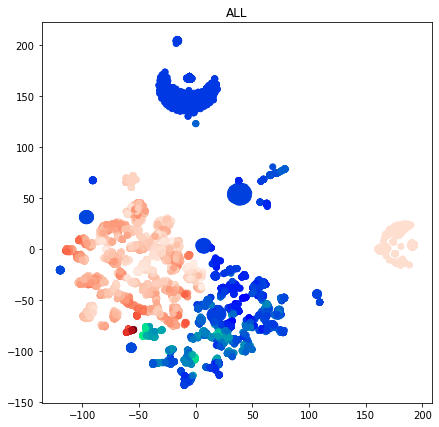

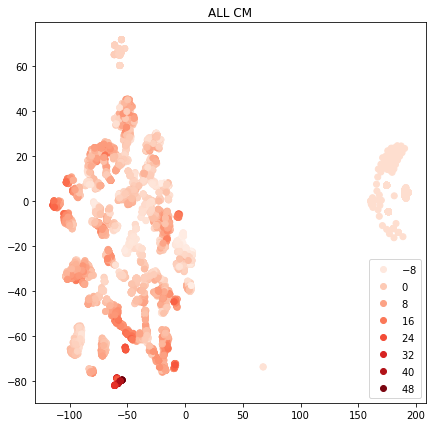

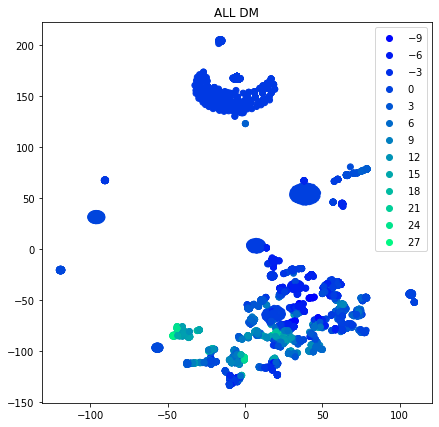

In [ ]:
#ALL
#color01A = np.sum(dfAll[Score_CM], axis=1)
color01CA = np.sum(pca_data_CM, axis=1)
color01DA = np.sum(pca_data_DM, axis=1)
#color01C = kmeans.fit_predict(pca_data_CM)
#color01D = kmeans.fit_predict(pca_data_DM)
#color01C = np.sum(dfM01[Score_DM_M01], axis=1)
#color01D = np.sum(dfM01[Score_CM_M01], axis=1)
# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data[:len(pca_data_CM), 0], final_tsne_data[:len(pca_data_CM), 1], c=color01CA, cmap="Reds")
plt.scatter(final_tsne_data[len(pca_data_CM):, 0], final_tsne_data[len(pca_data_CM):, 1], c=color01DA, cmap="winter")
plt.title("ALL")
plt.show()

plt.figure(figsize=(7,7))
pM01C = plt.scatter(final_tsne_data[:len(pca_data_CM), 0], final_tsne_data[:len(pca_data_CM), 1], c=color01CA, cmap="Reds")
plt.title("ALL CM")
plt.legend(*pM01C.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM01D = plt.scatter(final_tsne_data[len(pca_data_CM):, 0], final_tsne_data[len(pca_data_CM):, 1], c=color01DA, cmap="winter")
plt.title("ALL DM")
plt.legend(*pM01D.legend_elements())
plt.show()

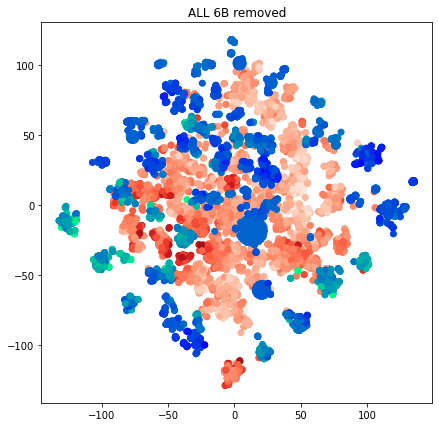

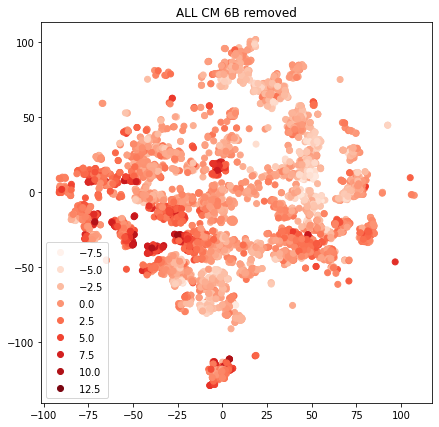

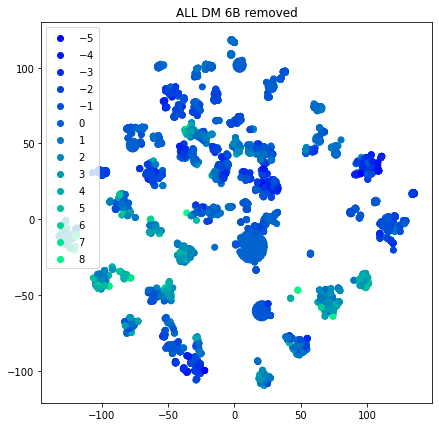

In [ ]:
#ALL / Remove 6B
#color01A = np.sum(dfAll[Score_CM], axis=1)
color01CAR6B = np.sum(pca_data_CM_removeM6B, axis=1)
color01DAR6B = np.sum(pca_data_DM_removeM6B, axis=1)
#color01C = kmeans.fit_predict(pca_data_CM)
#color01D = kmeans.fit_predict(pca_data_DM)
#color01C = np.sum(dfM01[Score_DM_M01], axis=1)
#color01D = np.sum(dfM01[Score_CM_M01], axis=1)
# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_tsne_data_removeM6B[:len(pca_data_CM_removeM6B), 0], final_tsne_data_removeM6B[:len(pca_data_CM_removeM6B), 1], c=color01CAR6B, cmap="Reds")
plt.scatter(final_tsne_data_removeM6B[len(pca_data_CM_removeM6B):, 0], final_tsne_data_removeM6B[len(pca_data_CM_removeM6B):, 1], c=color01DAR6B, cmap="winter")
plt.title("ALL 6B removed")
plt.show()

plt.figure(figsize=(7,7))
pM01CR6B = plt.scatter(final_tsne_data_removeM6B[:len(pca_data_CM_removeM6B), 0], final_tsne_data_removeM6B[:len(pca_data_CM_removeM6B), 1], c=color01CAR6B, cmap="Reds")
plt.title("ALL CM 6B removed")
plt.legend(*pM01CR6B.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pM01DR6B = plt.scatter(final_tsne_data_removeM6B[len(pca_data_CM_removeM6B):, 0], final_tsne_data_removeM6B[len(pca_data_CM_removeM6B):, 1], c=color01DAR6B, cmap="winter")
plt.title("ALL DM 6B removed")
plt.legend(*pM01DR6B.legend_elements())
plt.show()

#  7.2 UMAP Implementation

In [ ]:
# 7.2 Visualization Modification: UMAP

m = UMAP(n_components = 2, n_neighbors=25, min_dist=0.35)

# Fit transform the concatenated data

#m.fit(concatenated_tsne)
final_umap_data = m.fit_transform(concatenated_tsne)
final_umap_data_removeM6B = m.fit_transform(concatenated_tsne_removeM6B)
final_umap_data_M01 = m.fit_transform(concatenated_tsne_M01)
final_umap_data_M02 = m.fit_transform(concatenated_tsne_M02)
final_umap_data_M03 = m.fit_transform(concatenated_tsne_M03)
final_umap_data_M04 = m.fit_transform(concatenated_tsne_M04)
final_umap_data_M05 = m.fit_transform(concatenated_tsne_M05)
final_umap_data_M6A = m.fit_transform(concatenated_tsne_M6A)
#final_tsne_data_M6B = tsne.fit_transform(concatenated_tsne_M6B)

/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [ ]:
m = UMAP(n_components = 2, n_neighbors=25, min_dist=0.35)
final_umap_data_M01 = m.fit_transform(concatenated_tsne_M01)

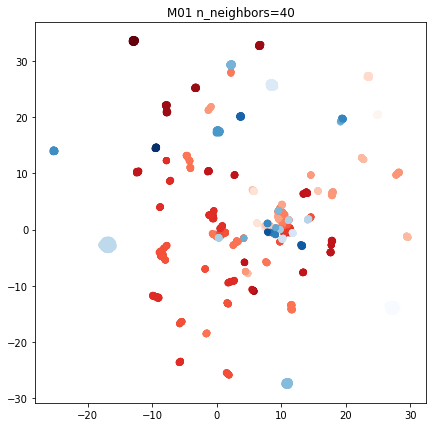

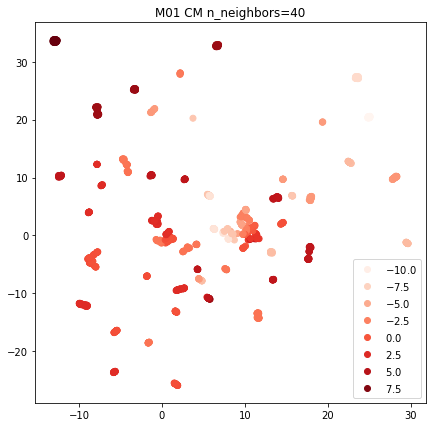

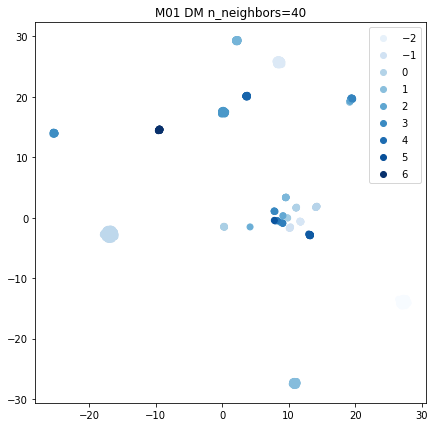

In [ ]:
#M01
#pca_data_CM_M01
#dfM01[Score_CM_M01].fillna(0)
#Ucolor01C = np.sum(dfM01[Score_CM], axis=1)
#Ucolor01C = np.sum(dfM01[Score_CM_M01].fillna(0), axis=1)
Ucolor01C = np.sum(dfM01[Score_CM_M01].fillna(0), axis=1)
Ucolor01D = np.sum(dfM01[Score_DM_M01].fillna(0), axis=1)
#kmeans = KMeans(n_clusters = 3)
#Ucolor01C = kmeans.fit_predict(dfM01[Score_CM_M01].fillna(0))
#Ucolor01D = kmeans.fit_predict(dfM01[Score_DM_M01].fillna(0))
#Ucolor01C = np.sum(dfM01[Score_DM_M01], axis=1)
#Ucolor01D = np.sum(dfM01[Score_CM_M01], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_M01[:len(dfM01[Score_CM_M01].fillna(0)), 0], final_umap_data_M01[:len(dfM01[Score_CM_M01].fillna(0)), 1], c=Ucolor01C, cmap="Reds")
plt.scatter(final_umap_data_M01[len(dfM01[Score_CM_M01].fillna(0)):, 0], final_umap_data_M01[len(dfM01[Score_CM_M01].fillna(0)):, 1], c=Ucolor01D, cmap="Blues")
plt.title("M01 n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_M01[:len(dfM01[Score_CM_M01].fillna(0)), 0], final_umap_data_M01[:len(dfM01[Score_CM_M01].fillna(0)), 1], c=Ucolor01C, cmap="Reds")
plt.title("M01 CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_M01[len(dfM01[Score_CM_M01].fillna(0)):, 0], final_umap_data_M01[len(dfM01[Score_CM_M01].fillna(0)):, 1], c=Ucolor01D, cmap="Blues")
plt.title("M01 DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

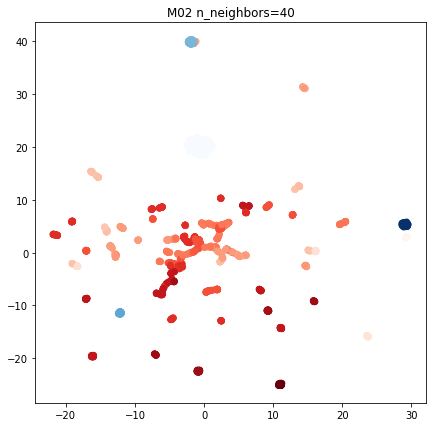

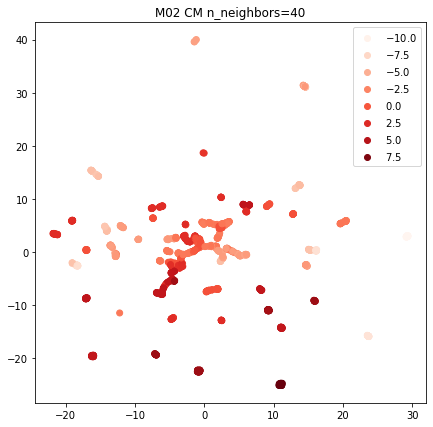

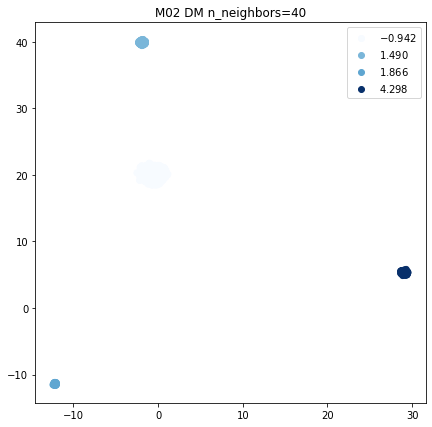

In [ ]:
#M02
#dfM02[Score_CM_M02].fillna(0)
#Ucolor02A = np.sum(dfM02[Score_CM_M02], axis=1)
Ucolor02C = np.sum(dfM02[Score_CM_M02].fillna(0), axis=1)
Ucolor02D = np.sum(dfM02[Score_DM_M02].fillna(0), axis=1)
#kmeans = KMeans(n_clusters = 3)
#Ucolor02C = kmeans.fit_predict(dfM02[Score_CM_M02].fillna(0))
#Ucolor02D = kmeans.fit_predict(dfM02[Score_DM_M02].fillna(0))
#Ucolor02C = np.sum(dfM02[Score_DM_M02], axis=1)
#Ucolor02D = np.sum(dfM02[Score_CM_M02], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_M02[:len(dfM02[Score_CM_M02].fillna(0)), 0], final_umap_data_M02[:len(dfM02[Score_CM_M02].fillna(0)), 1], c=Ucolor02C, cmap="Reds")
plt.scatter(final_umap_data_M02[len(dfM02[Score_CM_M02].fillna(0)):, 0], final_umap_data_M02[len(dfM02[Score_CM_M02].fillna(0)):, 1], c=Ucolor02D, cmap="Blues")
plt.title("M02 n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_M02[:len(dfM02[Score_CM_M02].fillna(0)), 0], final_umap_data_M02[:len(dfM02[Score_CM_M02].fillna(0)), 1], c=Ucolor02C, cmap="Reds")
plt.title("M02 CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_M02[len(dfM02[Score_CM_M02].fillna(0)):, 0], final_umap_data_M02[len(dfM02[Score_CM_M02].fillna(0)):, 1], c=Ucolor02D, cmap="Blues")
plt.title("M02 DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

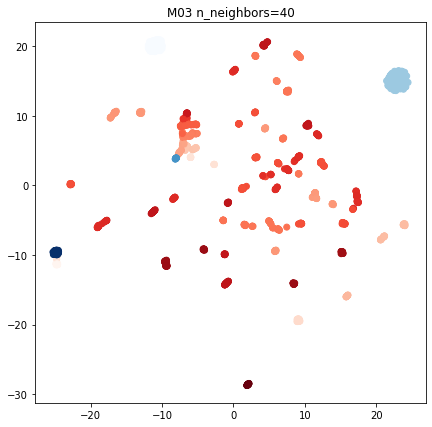

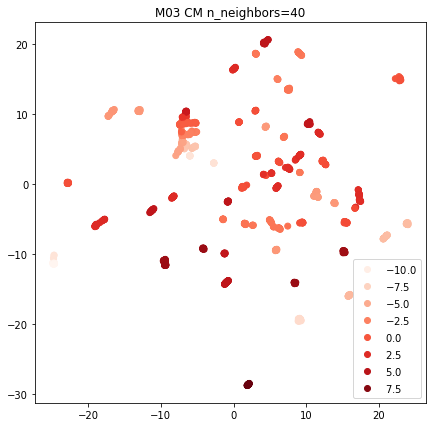

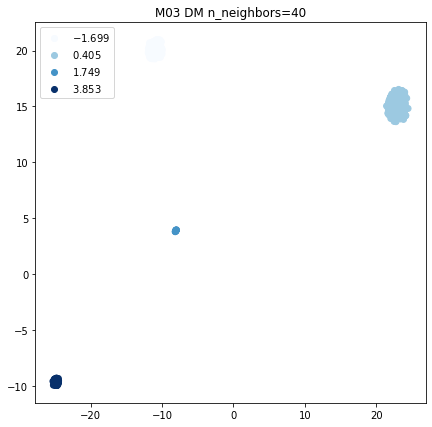

In [ ]:
#M03
#dfM03[Score_CM_M03].fillna(0)
#Ucolor03A = np.sum(dfM03[Score_CM], axis=1)
Ucolor03C = np.sum(dfM03[Score_CM_M03], axis=1)
Ucolor03D = np.sum(dfM03[Score_DM_M03], axis=1)
#kmeans = KMeans(n_clusters = 3)
#Ucolor03C = kmeans.fit_predict(dfM03[Score_CM_M03].fillna(0))
#Ucolor03D = kmeans.fit_predict(dfM03[Score_DM_M03].fillna(0))
#Ucolor03C = np.sum(dfM03[Score_DM_M03], axis=1)
#Ucolor03D = np.sum(dfM03[Score_CM_M03], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_M03[:len(dfM03[Score_CM_M03].fillna(0)), 0], final_umap_data_M03[:len(dfM03[Score_CM_M03].fillna(0)), 1], c=Ucolor03C, cmap="Reds")
plt.scatter(final_umap_data_M03[len(dfM03[Score_CM_M03].fillna(0)):, 0], final_umap_data_M03[len(dfM03[Score_CM_M03].fillna(0)):, 1], c=Ucolor03D, cmap="Blues")
plt.title("M03 n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_M03[:len(dfM03[Score_CM_M03].fillna(0)), 0], final_umap_data_M03[:len(dfM03[Score_CM_M03].fillna(0)), 1], c=Ucolor03C, cmap="Reds")
plt.title("M03 CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_M03[len(dfM03[Score_CM_M03].fillna(0)):, 0], final_umap_data_M03[len(dfM03[Score_CM_M03].fillna(0)):, 1], c=Ucolor03D, cmap="Blues")
plt.title("M03 DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

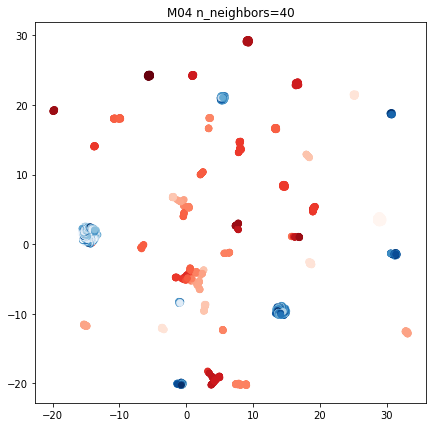

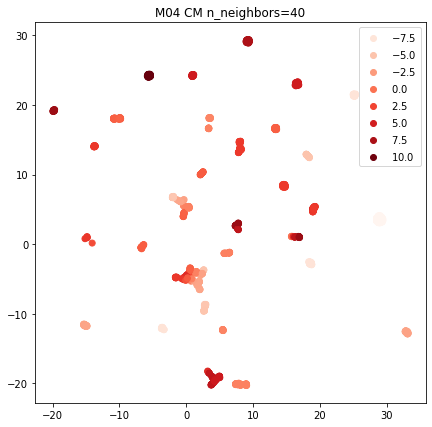

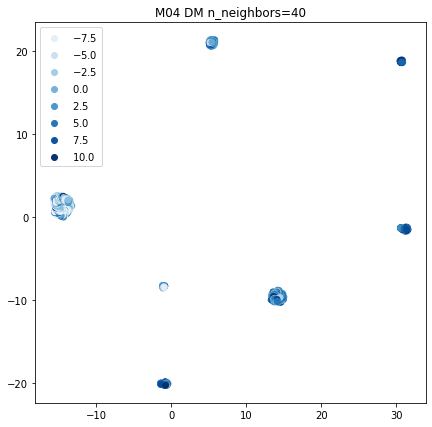

In [ ]:
#M04
#dfM04[Score_CM_M04].fillna(0)
#Ucolor04A = np.sum(dfM04[Score_CM], axis=1)
Ucolor04C = np.sum(dfM04[Score_CM_M04].fillna(0), axis=1)
Ucolor04D = np.sum(dfM04[Score_CM_M04].fillna(0), axis=1)
#kmeans = KMeans(n_clusters = 3)
#Ucolor04C = kmeans.fit_predict(dfM04[Score_CM_M04].fillna(0))
#Ucolor04D = kmeans.fit_predict(dfM04[Score_DM_M04].fillna(0))
#Ucolor04C = np.sum(dfM04[Score_DM_M04], axis=1)
#Ucolor04D = np.sum(dfM04[Score_CM_M04], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_M04[:len(dfM04[Score_CM_M04].fillna(0)), 0], final_umap_data_M04[:len(dfM04[Score_CM_M04].fillna(0)), 1], c=Ucolor04C, cmap="Reds")
plt.scatter(final_umap_data_M04[len(dfM04[Score_CM_M04].fillna(0)):, 0], final_umap_data_M04[len(dfM04[Score_CM_M04].fillna(0)):, 1], c=Ucolor04D, cmap="Blues")
plt.title("M04 n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_M04[:len(dfM04[Score_CM_M04].fillna(0)), 0], final_umap_data_M04[:len(dfM04[Score_CM_M04].fillna(0)), 1], c=Ucolor04C, cmap="Reds")
plt.title("M04 CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_M04[len(dfM04[Score_CM_M04].fillna(0)):, 0], final_umap_data_M04[len(dfM04[Score_CM_M04].fillna(0)):, 1], c=Ucolor04D, cmap="Blues")
plt.title("M04 DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

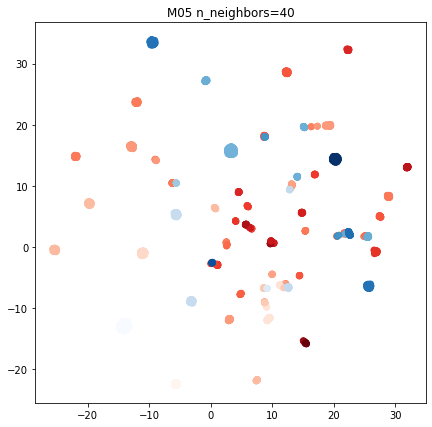

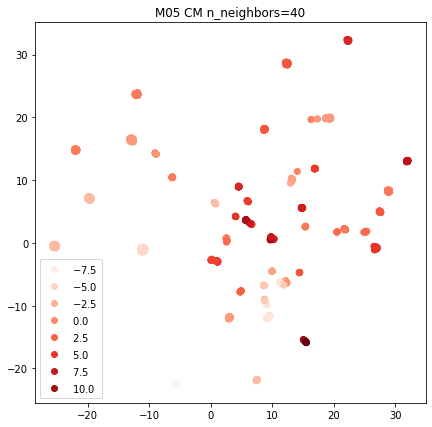

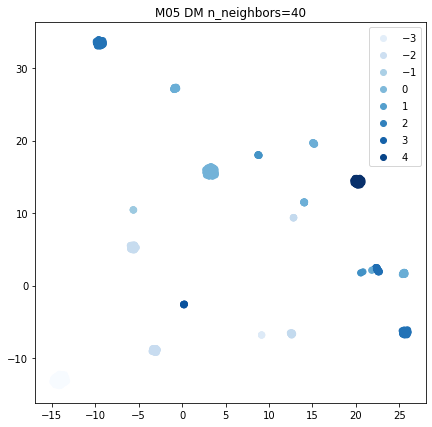

In [ ]:
#M05
#dfM05[Score_CM_M05].fillna(0)
#Ucolor05A = np.sum(dfM05[Score_CM], axis=1)
Ucolor05C = np.sum(dfM05[Score_CM_M05].fillna(0), axis=1)
Ucolor05D = np.sum(dfM05[Score_DM_M05].fillna(0), axis=1)
#kmeans = KMeans(n_clusters = 3)
#Ucolor05C = kmeans.fit_predict(dfM05[Score_CM_M05].fillna(0))
#Ucolor05D = kmeans.fit_predict(dfM05[Score_DM_M05].fillna(0))
#Ucolor05C = np.sum(dfM05[Score_DM_M05], axis=1)
#Ucolor05D = np.sum(dfM05[Score_CM_M05], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_M05[:len(dfM05[Score_CM_M05].fillna(0)), 0], final_umap_data_M05[:len(dfM05[Score_CM_M05].fillna(0)), 1], c=Ucolor05C, cmap="Reds")
plt.scatter(final_umap_data_M05[len(dfM05[Score_CM_M05].fillna(0)):, 0], final_umap_data_M05[len(dfM05[Score_CM_M05].fillna(0)):, 1], c=Ucolor05D, cmap="Blues")
plt.title("M05 n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_M05[:len(dfM05[Score_CM_M05].fillna(0)), 0], final_umap_data_M05[:len(dfM05[Score_CM_M05].fillna(0)), 1], c=Ucolor05C, cmap="Reds")
plt.title("M05 CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_M05[len(dfM05[Score_CM_M05].fillna(0)):, 0], final_umap_data_M05[len(dfM05[Score_CM_M05].fillna(0)):, 1], c=Ucolor05D, cmap="Blues")
plt.title("M05 DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

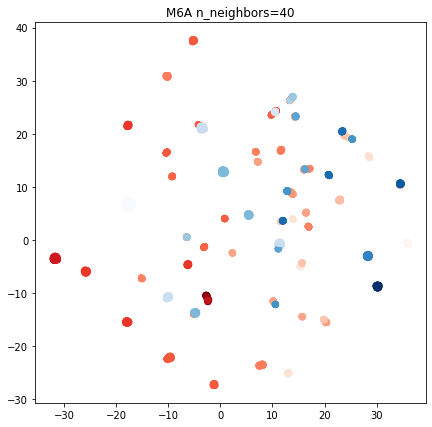

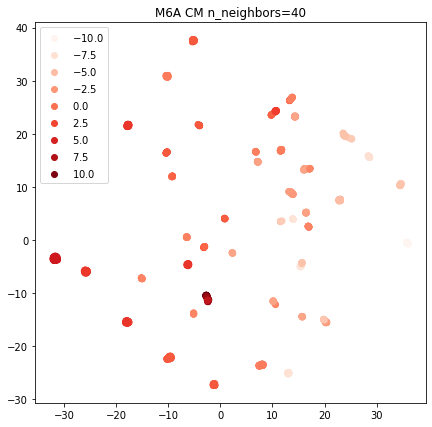

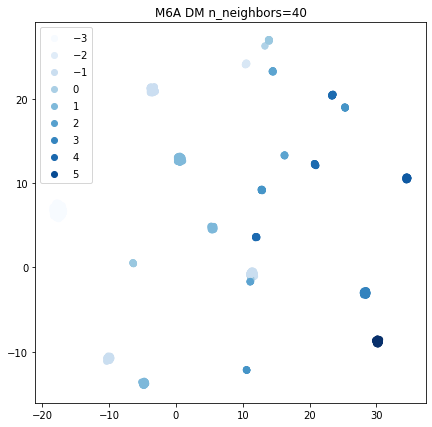

In [ ]:
#M6A
#dfM6A[Score_CM_M6A].fillna(0)
#Ucolor6AA = np.sum(dfM6A[Score_CM], axis=1)
Ucolor6AC = np.sum(dfM6A[Score_CM_M6A].fillna(0), axis=1)
Ucolor6AD = np.sum(dfM6A[Score_DM_M6A].fillna(0), axis=1)
#kmeans = KMeans(n_clusters = 3)
#Ucolor6AC = kmeans.fit_predict(dfM6A[Score_CM_M6A].fillna(0))
#Ucolor6AD = kmeans.fit_predict(dfM6A[Score_DM_M6A].fillna(0))
#Ucolor6AC = np.sum(dfM6A[Score_DM_M6A], axis=1)
#Ucolor6AD = np.sum(dfM6A[Score_CM_M6A], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_M6A[:len(dfM6A[Score_CM_M6A].fillna(0)), 0], final_umap_data_M6A[:len(dfM6A[Score_CM_M6A].fillna(0)), 1], c=Ucolor6AC, cmap="Reds",)
plt.scatter(final_umap_data_M6A[len(dfM6A[Score_CM_M6A].fillna(0)):, 0], final_umap_data_M6A[len(dfM6A[Score_CM_M6A].fillna(0)):, 1], c=Ucolor6AD, cmap="Blues")
plt.title("M6A n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_M6A[:len(dfM6A[Score_CM_M6A].fillna(0)), 0], final_umap_data_M6A[:len(dfM6A[Score_CM_M6A].fillna(0)), 1], c=Ucolor6AC, cmap="Reds")
plt.title("M6A CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_M6A[len(dfM6A[Score_CM_M6A].fillna(0)):, 0], final_umap_data_M6A[len(dfM6A[Score_CM_M6A].fillna(0)):, 1], c=Ucolor6AD, cmap="Blues")
plt.title("M6A DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

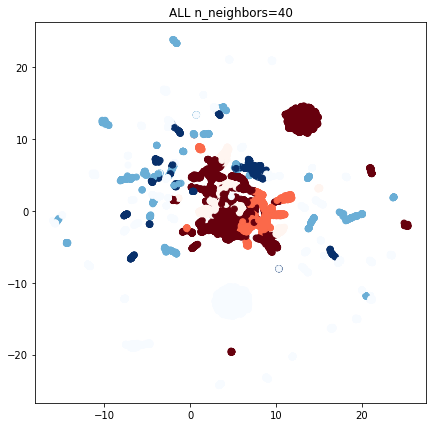

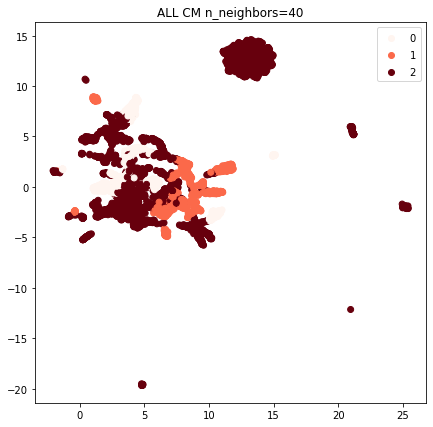

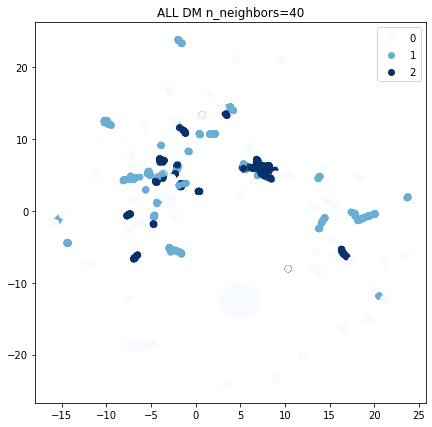

In [ ]:
#ALL
#color01A = np.sum(dfAll[Score_CM], axis=1)
#color01CA = np.sum(dfAll[Score_CM], axis=1)
#color01DA = np.sum(dfAll[Score_DM], axis=1)
kmeans = KMeans(n_clusters = 3)
color01CA = kmeans.fit_predict(dfAll[Score_CM].fillna(0))
color01DA = kmeans.fit_predict(dfAll[Score_DM].fillna(0))
#color01C = np.sum(dfM01[Score_DM_M01], axis=1)
#color01D = np.sum(dfM01[Score_CM_M01], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data[:len(dfAll[Score_CM].fillna(0)), 0], final_umap_data[:len(dfAll[Score_CM].fillna(0)), 1], c=color01CA, cmap="Reds")
plt.scatter(final_umap_data[len(dfAll[Score_CM].fillna(0)):, 0], final_umap_data[len(dfAll[Score_CM].fillna(0)):, 1], c=color01DA, cmap="Blues")
plt.title("ALL n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data[:len(dfAll[Score_CM].fillna(0)), 0], final_umap_data[:len(dfAll[Score_CM].fillna(0)), 1], c=color01CA, cmap="Reds")
plt.title("ALL CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data[len(dfAll[Score_CM].fillna(0)):, 0], final_umap_data[len(dfAll[Score_CM].fillna(0)):, 1], c=color01DA, cmap="Blues")
plt.title("ALL DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

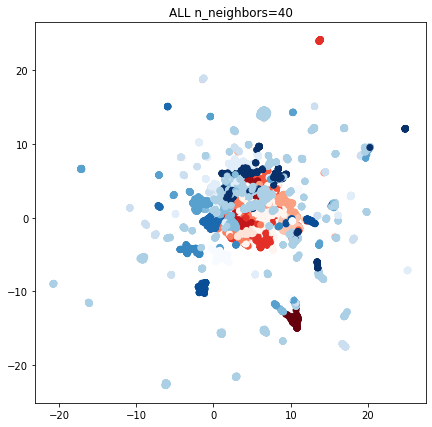

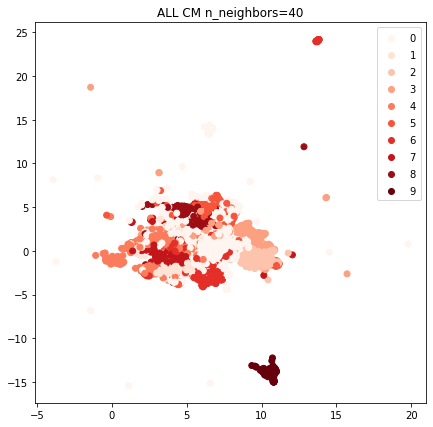

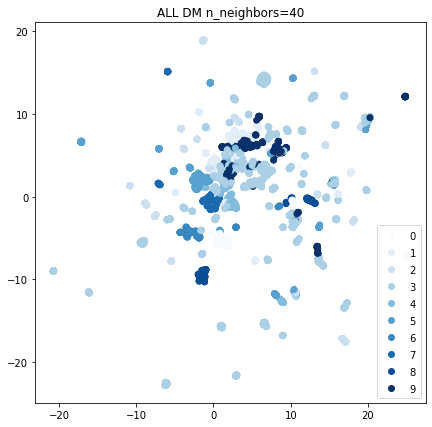

In [ ]:
#ALL / 6B removed

#dfAll_removeM6B[Score_CM_removeM6B].fillna(0)
#Ucolor6AA = np.sum(dfM6A[Score_CM], axis=1)
#Ucolor6AC = np.sum(dfAll_removeM6B[Score_CM_removeM6B].fillna(0), axis=1)
#Ucolor6AD = np.sum(dfAll_removeM6B[Score_DM_removeM6B].fillna(0), axis=1)
kmeans = KMeans(n_clusters = 10)
Ucolor6AC = kmeans.fit_predict(dfAll_removeM6B[Score_CM_removeM6B].fillna(0))
Ucolor6AD = kmeans.fit_predict(dfAll_removeM6B[Score_DM_removeM6B].fillna(0))
#Ucolor6AC = np.sum(dfM6A[Score_DM_M6A], axis=1)
#Ucolor6AD = np.sum(dfM6A[Score_CM_M6A], axis=1)

# Plot the visualization using scatter plot
plt.figure(figsize=(7,7))
plt.scatter(final_umap_data_removeM6B[:len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)), 0], final_umap_data_removeM6B[:len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)), 1], c=Ucolor6AC, cmap="Reds")
plt.scatter(final_umap_data_removeM6B[len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)):, 0], final_umap_data_removeM6B[len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)):, 1], c=Ucolor6AD, cmap="Blues")
plt.title("ALL n_neighbors=40")
plt.show()

plt.figure(figsize=(7,7))
pAC = plt.scatter(final_umap_data_removeM6B[:len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)), 0], final_umap_data_removeM6B[:len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)), 1], c=Ucolor6AC, cmap="Reds")
plt.title("ALL CM n_neighbors=40")
plt.legend(*pAC.legend_elements())
plt.show()

plt.figure(figsize=(7,7))
pAD = plt.scatter(final_umap_data_removeM6B[len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)):, 0], final_umap_data_removeM6B[len(dfAll_removeM6B[Score_CM_removeM6B].fillna(0)):, 1], c=Ucolor6AD, cmap="Blues")
plt.title("ALL DM n_neighbors=40")
plt.legend(*pAD.legend_elements())
plt.show()

# 8. OTHERS (FOR PRESENTATION)

In [ ]:
# TSNE M01

unique_colors_C = np.unique(color01C)
unique_colors_D = np.unique(color01D)

counts_C = [np.sum(color01C == c) for c in unique_colors_C]
counts_D = [np.sum(color01D == c) for c in unique_colors_D]

counts_dict_C = dict(zip(unique_colors_C, counts_C))
counts_dict_D = dict(zip(unique_colors_D, counts_D))

In [ ]:
counts_dict_C, counts_dict_D

In [ ]:
total1C = 0
total2C = 0
total3C = 0
total4C = 0
total1D = 0
total2D = 0
total3D = 0
total4D = 0

for key, value in counts_dict_C.items():
    if key<=6 and key>3:
        total1C += value

for key, value in counts_dict_C.items():
    if key<=3 and key>1:
        total2C += value

for key, value in counts_dict_C.items():
    if key<=1 and key>-1:
        total3C += value

for key, value in counts_dict_C.items():
    if key<=-1 and key>=-3:
        total4C += value

for key, value in counts_dict_D.items():
    if key<=6 and key>3:
        total1D += value

for key, value in counts_dict_D.items():
    if key<=3 and key>1:
        total2D += value

for key, value in counts_dict_D.items():
    if key<=1 and key>-1:
        total3D += value

for key, value in counts_dict_D.items():
    if key<=-1 and key>=-3:
        total4D += value

In [ ]:
total1C, total2C, total3C, total4C

(184, 110, 535, 530)

In [ ]:
total1D, total2D, total3D, total4D

(94, 182, 639, 442)

In [ ]:
# TSNE R6B

unique_colors_C = np.unique(color01CAR6B)
unique_colors_D = np.unique(color01DAR6B)

counts_C = [np.sum(color01CAR6B == c) for c in unique_colors_C]
counts_D = [np.sum(color01DAR6B == c) for c in unique_colors_D]

counts_dict_C = dict(zip(unique_colors_C, counts_C))
counts_dict_D = dict(zip(unique_colors_D, counts_D))

total1xC = 0
total2xC = 0
total3xC = 0
total1xD = 0
total2xD = 0
total3xD = 0

for key, value in counts_dict_C.items():
    if key<=13 and key>=7.5:
        total1xC += value

for key, value in counts_dict_C.items():
    if key<=7.49 and key>=0:
        total2xC += value

for key, value in counts_dict_C.items():
    if key<=-0.01 and key>=-8:
        total3xC += value

for key, value in counts_dict_D.items():
    if key<=8 and key>=6:
        total1xD += value

for key, value in counts_dict_D.items():
    if key<=5.99 and key>=1.5:
        total2xD += value

for key, value in counts_dict_D.items():
    if key<=1.49 and key>=-6:
        total3xD += value

In [ ]:
total1xC, total2xC, total3xC

(57, 2042, 2582)

In [ ]:
total1xD, total2xD, total3xD

(44, 851, 3778)

In [ ]:
# UMAP M01

t1C = 0
t2C = 0
t3C = 0
t1D = 0
t2D = 0
t3D = 0

unique_colors_C = np.unique(Ucolor01C)
unique_colors_D = np.unique(Ucolor01D)

counts_C = [np.sum(Ucolor01C == c) for c in unique_colors_C]
counts_D = [np.sum(Ucolor01D == c) for c in unique_colors_D]

counts_dict_C = dict(zip(unique_colors_C, counts_C))
counts_dict_D = dict(zip(unique_colors_D, counts_D))

for key, value in counts_dict_C.items():
    if key<=7.5 and key>=4.7:
        t1C += value

for key, value in counts_dict_C.items():
    if key<=4.67 and key>=-2.5:
        t2C += value

for key, value in counts_dict_C.items():
    if key<=-2.51 and key>=-11:
        t3C += value

for key, value in counts_dict_D.items():
    if key<=6 and key>=4:
        t1D += value

for key, value in counts_dict_D.items():
    if key<=3.99 and key>=1:
        t2D += value

for key, value in counts_dict_D.items():
    if key<=0.99 and key>=-3:
        t3D += value

In [ ]:
t1C, t2C, t3C

(142, 749, 390)

In [ ]:
t1D, t2D, t3D

(53, 349, 928)

In [ ]:
# UMAP ALL REMOVE 6B

unique_colors_C = np.unique(Ucolor6AC)
unique_colors_D = np.unique(Ucolor6AD)

counts_C = [np.sum(Ucolor6AC == c) for c in unique_colors_C]
counts_D = [np.sum(Ucolor6AD == c) for c in unique_colors_D]

counts_dict_C = dict(zip(unique_colors_C, counts_C))
counts_dict_D = dict(zip(unique_colors_D, counts_D))

t1Cx = 0
t2Cx = 0
t3Cx = 0
t1Dx = 0
t2Dx = 0
t3Dx = 0

for key, value in counts_dict_C.items():
    if key<=9 and key>=7:
        t1Cx += value

for key, value in counts_dict_C.items():
    if key<=6.99 and key>=3.5:
        t2Cx += value

for key, value in counts_dict_C.items():
    if key<=3.49 and key>=-1:
        t3Cx += value

for key, value in counts_dict_D.items():
    if key<=10 and key>=6.5:
        t1Dx += value

for key, value in counts_dict_D.items():
    if key<=6.49 and key>=3:
        t2Dx += value

for key, value in counts_dict_D.items():
    if key<=2.99 and key>=-1:
        t3Dx += value

In [ ]:
t1Cx, t2Cx, t3Cx

(18, 148, 680)

In [ ]:
t1Dx, t2Dx, t3Dx

(0, 266, 535)